<a href="https://colab.research.google.com/github/susanje/clusteringpractica/blob/main/tecnicasdereducciondedimensionalidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets

from sklearn.decomposition import (PCA, IncrementalPCA,
KernelPCA, TruncatedSVD,
FastICA, MiniBatchDictionaryLearning,
SparsePCA)

from sklearn.manifold import (Isomap,
LocallyLinearEmbedding)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.random_projection import (GaussianRandomProjection,
SparseRandomProjection)

from sklearn.neighbors import (KNeighborsClassifier,
NeighborhoodComponentsAnalysis)

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

In [24]:
# cargar los datos del dataset digits que viene precargado en sklearn dataset
digits = datasets.load_digits()
X, y = digits.data, digits.target

# Parametrizamos
dim = len(X[0])
n_classes = len(np.unique(y))
n_neighbors = 3
random_state = 0

# Dividimos en test y trian
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.5, stratify=y,
random_state=random_state)

Canalización: en cada una de las técnicas, crearemos una canalización (usando make_pipeline de sklearn) en la que se escalarán los datos (usando StandardScaler) antes de pasar al método de reducción de dimensionalidad.

PCA

In [26]:
pca = make_pipeline(StandardScaler(), # El primer componente principal trata de capturar la varianza máxima del conjunto original de características.
PCA(n_components=2, #numero de componentes que queremos que queden
random_state=random_state))

ICA

In [27]:
inc_pca = make_pipeline(StandardScaler(), #conserva los vectores singulares más significativos para proyectar los datos en un espacio a tamaño reducido.
IncrementalPCA(n_components=2))

KERNEL PCA

In [28]:
# kernel : “linear” | “poly” | “rbf” | “sigmoid” | “cosine” | “precomputed” #TIPOS DE KERNEL QUE PODEMOS ELEGIR
kpca = make_pipeline(StandardScaler(), #KPCA hace posible realizar proyecciones no lineales complejas para la reducción de la dimensionalidad.
KernelPCA(kernel="cosine", # Kernel usado por PCA
n_components=2, # Numero de componentes
gamma=None, # Kernel coeficiente por rbf, poly and sigmoid kernels
fit_inverse_transform=True,
random_state=random_state, # poner un entero para obtener resultados reproducibles
n_jobs=1)) # El número de trabajos paralelos a ejecutar. -1 significa usar todos los procesadores.

**SPARSE PCA** utiliza los enlaces entre PCA y SVD para extraer los componentes principales resolviendo un problema de aproximación de matriz de orden inferior

In [29]:
sparsepca = make_pipeline(StandardScaler(),
SparsePCA(n_components=2, #Número de átomos dispersos a extraer.
alpha=0.0001, # Parámetro de control de dispersión. Los valores más altos conducen a componentes más dispersos.
random_state=random_state, # poner un entero para obtener resultados reproducibles
n_jobs=-1)) # El número de trabajos paralelos a ejecutar. -1 significa usar todos los procesadores.

**SVD** se puede aplicar incluso en matrices rectangulares; mientras que los valores propios se definen solo para matrices cuadradas. Como son de naturaleza rectangular, necesitamos tener vectores singulares a la izquierda y vectores singulares a la derecha respectivamente para sus dimensiones.

In [30]:
SVD = make_pipeline(StandardScaler(),
TruncatedSVD(n_components=2, # Dimensionalidad deseada de los datos de salida.
# Debe ser estrictamente menor que el número de características.
# El valor predeterminado es útil para la visualización.

algorithm='randomized', # Metodo que usa SVD para resolver.
random_state=random_state,
n_iter=5)) 

**Proyección aleatoria gaussiana**
En la proyección aleatoria, los datos con una dimensión muy grande (d) se proyectan en un espacio bidimensional (kd) con una matriz aleatoria.

In [31]:
GRP = make_pipeline(StandardScaler(),
GaussianRandomProjection(n_components=2, #  Dimensionalidad del espacio de proyección.
eps = 0.5, # Parámetro para controlar la calidad de la incrustación.
# Los valores más pequeños conducen a una mejor incrustación y a un mayor número de dimensiones (n_components ) en el espacio de proyección de destino.
random_state=random_state))

**LDA** es un clasificador con un límite de decisión lineal, generado ajustando densidades condicionales de clase a los datos y usando la regla de Bayes.

In [32]:
lda = make_pipeline(StandardScaler(),
LinearDiscriminantAnalysis(n_components=2))
# Número de componentes (<= min(n_classes - 1, n_features)) para la reducción de dimensionalidad.

**El análisis de componentes de vecindario (NCA)** es un algoritmo de aprendizaje automático para el aprendizaje de métricas. Aprende una transformación lineal de forma supervisada para mejorar la precisión de clasificación de una regla estocástica de vecinos más cercanos en el espacio transformado

In [33]:
nca = make_pipeline(StandardScaler(),
NeighborhoodComponentsAnalysis(n_components=2, # Dimensionalidad preferida del espacio proyectado. Si no hay ninguna, se establecerá en n_features.
random_state=random_state))

**Proyección aleatoria dispersa**
La matriz aleatoria fragmentada es una alternativa a la matriz de proyección aleatoria densa con métodos tradicionales de reducción de dimensiones. Garantiza una calidad de incrustación similar al mismo tiempo que maximiza la eficiencia de la memoria y permite un cálculo más rápido de los datos proyectados.

In [34]:
SRP = make_pipeline(StandardScaler(),
SparseRandomProjection(n_components=2, # Dimensionalidad del espacio de proyección de destino.
density = 'auto', # Proporción en el rango (0, 1] del componente distinto de cero en la matriz de proyección aleatoria.
# Si la densidad = 'auto', el valor se establece en la densidad mínima
eps = 0.5, # Parámetro para controlar la calidad de la incrustación
# Los valores más pequeños conducen a una mejor incrustación y una mayor cantidad de dimensiones (n_componentes) en el espacio de proyección de destino
random_state=random_state,
dense_output = False))
# Si es True,hay que  asegúrarse de que la salida de la proyección aleatoria sea una matriz numérica densa, incluso si la matriz de entrada y la proyección aleatoria son escasas.
# Si es False, los datos proyectados usan una representación escasa si la entrada es escasa.

**ISOMAP**
Es un método de reducción de dimensionalidad no lineal basado en la teoría espectral que intenta preservar las distancias geodésicas en la dimensión inferior.

In [35]:
isomap = make_pipeline(StandardScaler(),
Isomap(n_components=2, # número de coordenadas para el múltiple
n_jobs = 4, # El número de trabajos paralelos a ejecutar. -1 significa usar todos los procesadores.
n_neighbors = 5)) # número de vecinos a considerar para cada punto.

**Aprendizaje de diccionario MiniBatch**
El aprendizaje basado en diccionarios resuelve un problema de factorización de matrices que consiste en encontrar un diccionario que pueda dar buenos resultados bajo la condición de parsimonia del código.

In [36]:
miniBatchDictLearning = make_pipeline(StandardScaler(),
MiniBatchDictionaryLearning(n_components=2, # Número de elementos de diccionario para extraer.
batch_size = 200, #Número de muestras en cada mini-lote.
alpha = 1, # Parámetro de control de dispersión.
n_iter = 25, # Número total de iteraciones a realizar
random_state=random_state))

**ICA** El análisis de componentes independientes es un método utilizado principalmente para el procesamiento de señales para separar linealmente datos mixtos.

In [37]:
FastICA = make_pipeline(StandardScaler(),
FastICA(n_components=2, # Número de componentes a usar. Si no se pasa ninguno, se usan todos.
algorithm = 'parallel', # Aplicar algoritmo paralelo o deflacionario para FastICA.
whiten = True, #  Si whiten es falso, los datos ya se consideran blanqueados y no se realiza blanqueamiento
max_iter = 100, # Número máximo de iteraciones durante el fit
random_state=random_state))

**LLE** funciona midiendo primero cómo cada instancia de entrenamiento se relaciona linealmente con sus vecinos más cercanos (cn) y luego buscando una representación de baja dimensión del conjunto de entrenamiento donde estas relaciones locales se conservan mejor (más detalles en breve). Esto lo hace particularmente bueno para desenrollar colectores retorcidos, especialmente cuando no hay demasiado ruido.

In [38]:
lle = make_pipeline(StandardScaler(),
LocallyLinearEmbedding(n_components=2, # número de coordenadas para la variedad/manifold
n_neighbors = 10, # número de vecinos a considerar para cada punto.
method = 'modified', # {‘standard’, ‘hessian’, ‘modified’, ‘ltsa’},
# default='standard': el algoritmo de incrustación lineal local estándar.
n_jobs = 4, # El número de trabajos paralelos a ejecutar. Ninguno significa 1. -1 significa usar todos los procesadores..
random_state=random_state))

# ***Usar un clasificador vecino más cercano para evaluar los métodos***

In [39]:
knn = KNeighborsClassifier(n_neighbors=n_neighbors) # Número de vecinos a usar

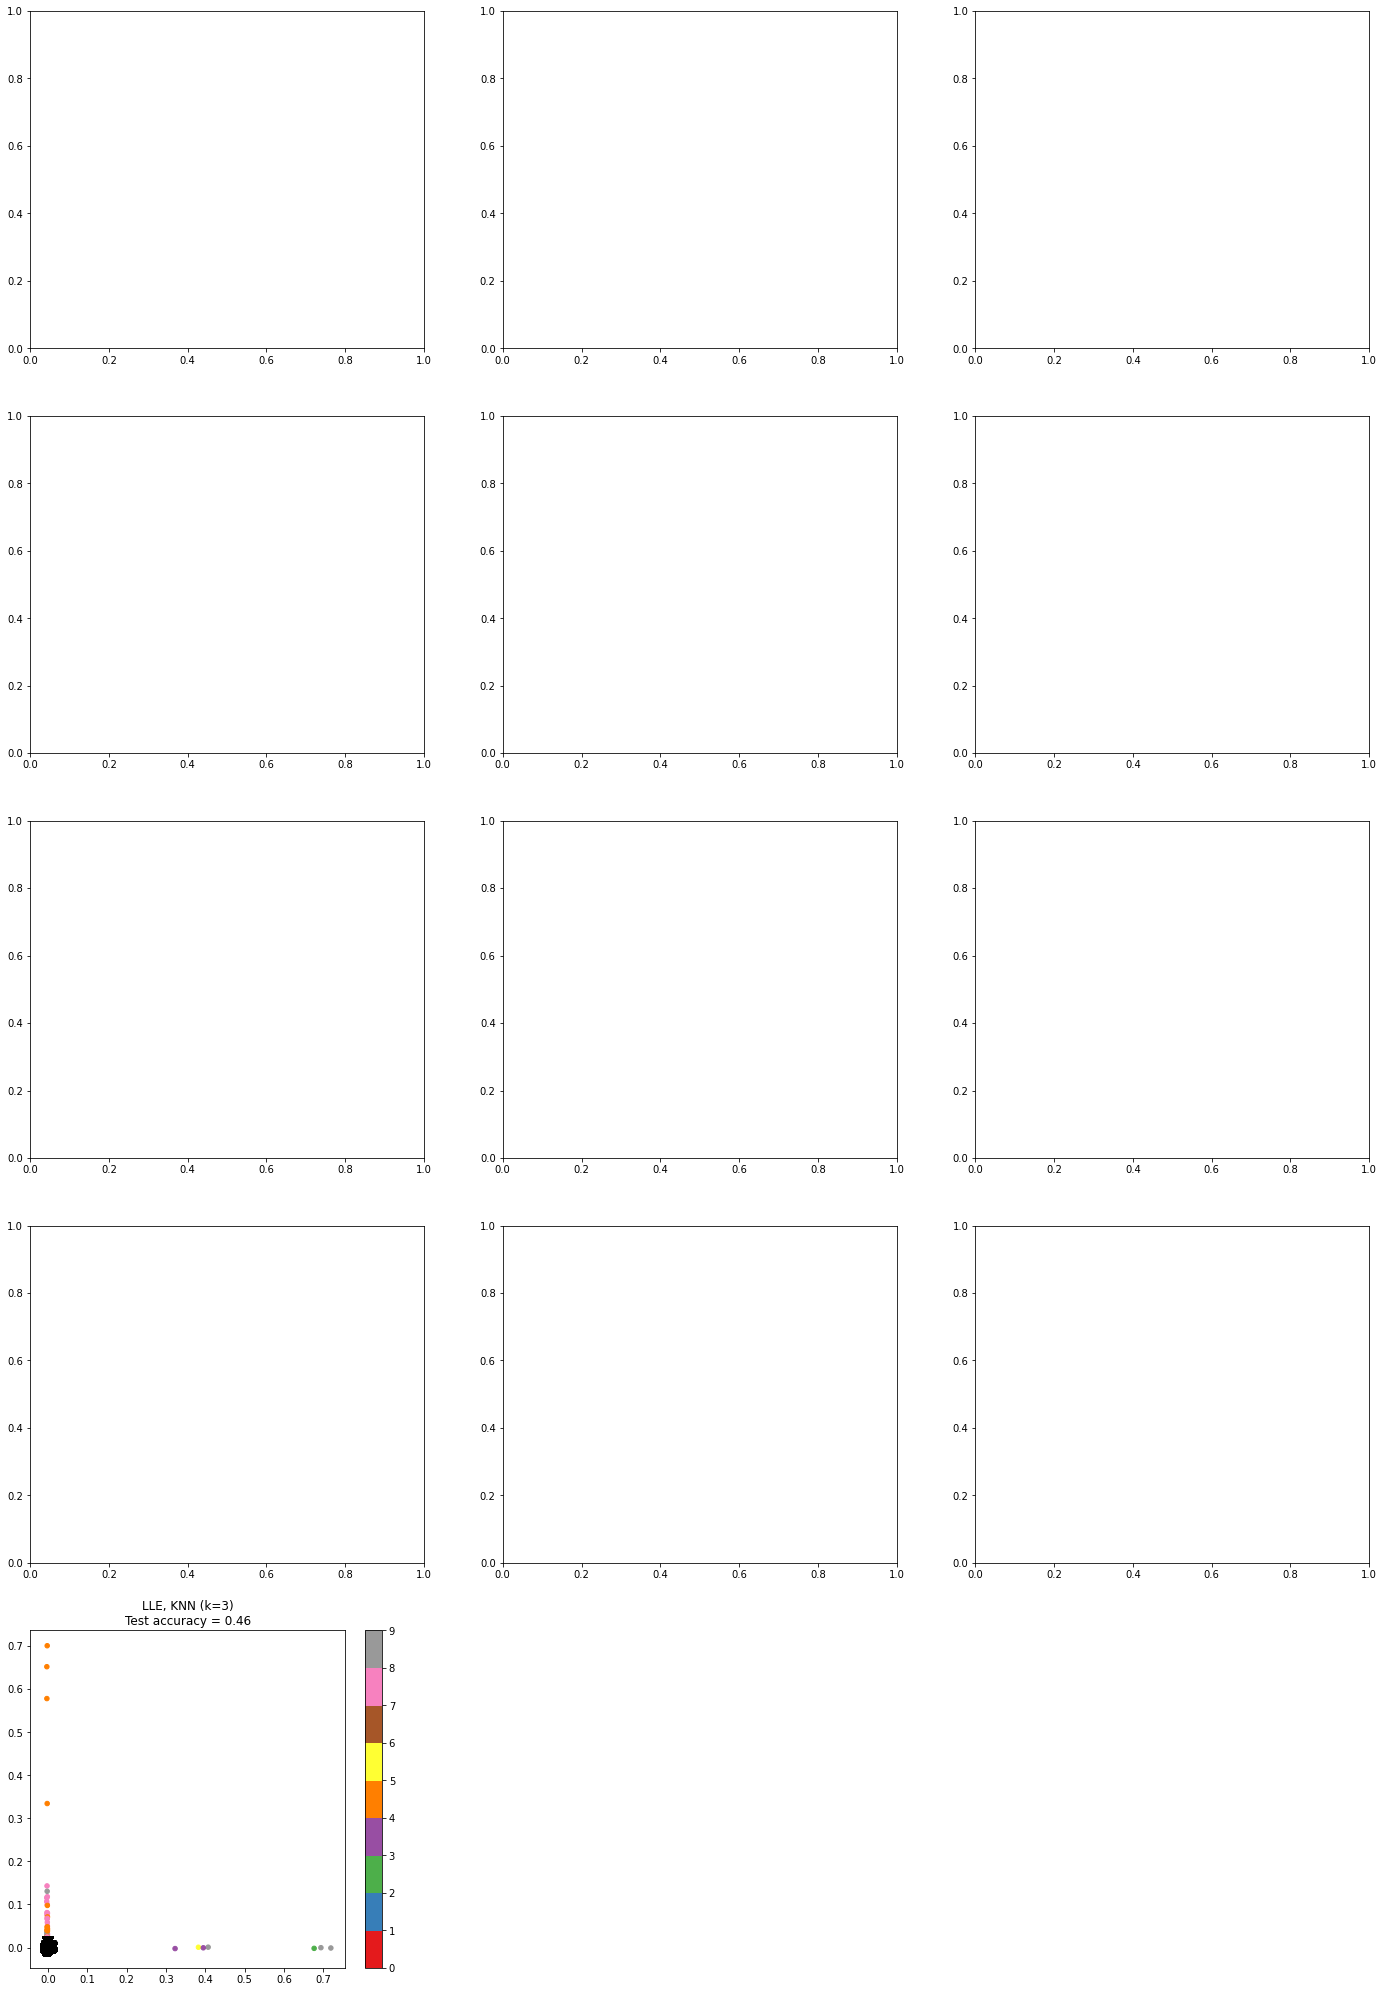

In [40]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
# lista de los métodos a comparar
dim_reduction_methods = {'PCA': pca,
'LDA': lda,
'NCA': nca,
'INC PCA': inc_pca,
'KPCA':kpca,
'Sparced PCA': sparsepca,
'SVD': SVD,
'GRP' : GRP,
'SRP': SRP,
'IsoMap': isomap,
'MBD': miniBatchDictLearning,
'ICA': FastICA,
'LLE': lle}
plt.figure(figsize=(24, 36))

for j,(name, model) in enumerate(dim_reduction_methods.items()):
                                                                plt.subplot(5, 3, j + 1, aspect='auto')

# Ajustar el modelo del método
model.fit(X_train, y_train)

# Ajusta un clasificador vecino más cercano en el conjunto de entrenamiento incrustado
knn.fit(model.transform(X_train), y_train)

# Ajusta un clasificador vecino más cercano en el conjunto de entrenamiento incrustado
acc_knn = knn.score(model.transform(X_test), y_test)

# Ajuste los métodos usando el modelo ajustado
X_embedded = model.transform(X)

# Creación de un dataframe para plotear en un grafico la variable de muestra
df = pd.DataFrame(np.concatenate((X_embedded, np.reshape(y, (-1, 1))), axis=1))

# Trazar los puntos proyectados y mostrar el puntaje de evaluación
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=20, cmap='Set1')
plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format(name,
n_neighbors,
acc_knn))
plt.colorbar()

# Etiquete las distribuciones de datos
for i, number in enumerate(y_test):
                  plt.annotate(number,
                  df.loc[df[2]==number,[0,1]].mean(),
                  horizontalalignment='center',
                  verticalalignment='center',
                  weight='bold',
                  size='20')

plt.show()